In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = "C:\\1_MS_DataScience\\Assignments\\Online Retail.xlsx"
df = pd.read_excel(path, sheet_name='OnlineRetail')

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['InvoiceDate'].dtype

dtype('<M8[ns]')

In [ ]:
df.isna(). sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
cs = df.dropna() #drop all the rows that has missing values

In [ ]:
cs.loc[:, 'InvoiceDate'] = pd.to_datetime(cs['InvoiceDate'])

In [ ]:
#to check the start and end date of the dataframe
cs['InvoiceDate'].min(), cs['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [ ]:
#DataPreprocessing 
cs2011 = cs[cs['InvoiceDate'].dt.year == 2011]


In [ ]:
#Create a variable named Amount by multiplying Quantity with UnitPrice
cs.loc[:,'Amount'] = cs.Quantity * cs.UnitPrice

C:\Users\iqrra\AppData\Local\Temp\ipykernel_17000\2821472795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs.loc[:,'Amount'] = cs.Quantity * cs.UnitPrice


In [ ]:
#Separate the variable InvoiceDate into two variables Date and Time.
cs.loc[:, 'Date'] = cs['InvoiceDate'].dt.date
cs.loc[:, 'Time'] = cs['InvoiceDate'].dt.time

C:\Users\iqrra\AppData\Local\Temp\ipykernel_17000\541418787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs.loc[:, 'Date'] = cs['InvoiceDate'].dt.date
C:\Users\iqrra\AppData\Local\Temp\ipykernel_17000\541418787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs.loc[:, 'Time'] = cs['InvoiceDate'].dt.time


In [ ]:
cs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00


In [ ]:
#Group data such that all customers with the same CustomerId are together.
cs=cs.groupby('CustomerID')

In [ ]:
#create a column Recency which counts the number of months that have passed since the invoice date
target_date = pd.Timestamp('2012-01-01')
Recency = cs['InvoiceDate'].max().apply(lambda date: (target_date.year - date.year) * 12 + (target_date.month - date.month))

In [ ]:

#Calculate the frequency
frequecy =cs['InvoiceNo'].nunique()
amount = cs['Amount'].sum()
min_amount = cs['Amount'].min()
max_amount = cs['Amount'].max()
mean_amount = cs['Amount'].mean()




In [ ]:
#create a new dataframe with the features CustomerId, Recency, Frequency, Amount, Minimum, Maximum, and Mean
cs_new = pd.DataFrame({
    'Recency': Recency.max(),
    'Frequency' : cs['InvoiceNo'].nunique(),
    'Amount' : amount,
    'Minimum': min_amount,
    'Maximum' : max_amount,
    'Mean': mean_amount


}).reset_index()

In [ ]:
cs_new.shape

(4372, 7)

In [ ]:
cs_new.describe()

,CustomerID,Recency,Frequency,Amount,Minimum,Maximum,Mean
count,4372.000000,4372.0,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,13.0,5.075480,1898.459701,-86.425754,185.179522,28.839013
std,1722.390705,0.0,9.338754,8219.345141,2876.398935,2881.283699,127.323926
min,12346.000000,13.0,1.000000,-4287.630000,-168469.600000,-4287.630000,-4287.630000
25%,13812.750000,13.0,1.000000,293.362500,-11.500000,31.800000,10.985960
50%,15300.500000,13.0,3.000000,648.075000,0.790000,52.020000,16.918616
75%,16778.250000,13.0,5.000000,1611.725000,6.960000,102.000000,23.542941
max,18287.000000,13.0,248.000000,279489.020000,3861.000000,168469.600000,3861.000000


In [ ]:
#visually represent outlier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

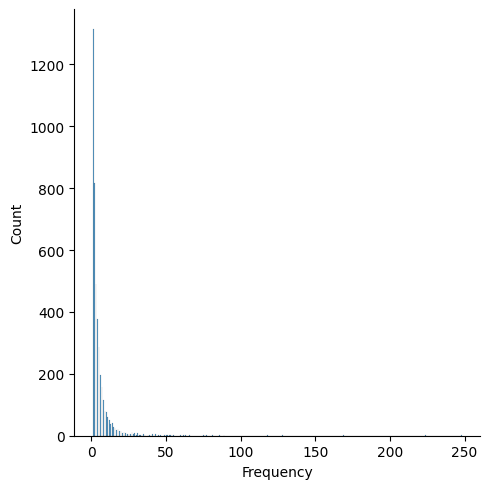

In [ ]:
#tosee the number
sns.displot(cs_new['Frequency'])


In [ ]:
#funciton to called the outlier 
def outliers(f, ft): 
    Q1 = f[ft].quantile(0.25)
    Q3 = f[ft].quantile(0.75)
    IQR = Q3 -Q1

    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5 *IQR
    ls = f.index[ (f[ft]< lower_bound) | (f[ft]> upper_bound)]

    return ls


In [ ]:
#create an empty list to store the output indices from multiple columns 
index_list = []
for features in ['Frequency', 'Amount']:
    index_list.extend(outliers(cs_new, features)) #we want to save the index list in the same list therefore I am using extend fiucntion

In [ ]:
index_list #these are the outliers 


In [ ]:
#function called remove which returns a clean dataframe without outliers
def remove(f, ls):
    ls = sorted(set(ls))
    f = f.drop(ls)
    return f

In [ ]:
cs_cleaned = remove(cs_new, index_list)

In [ ]:
cs_cleaned.shape

(3829, 7)

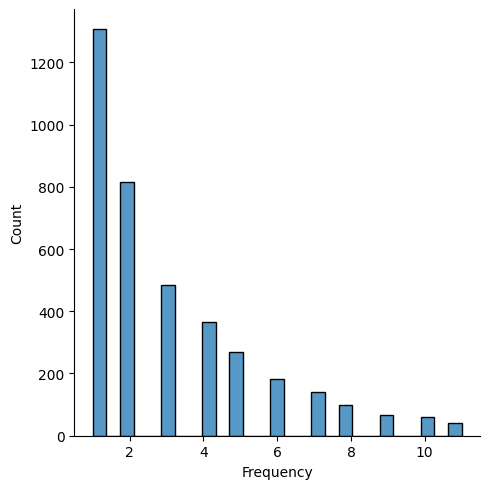

In [ ]:
sns.displot(cs_cleaned['Frequency'])

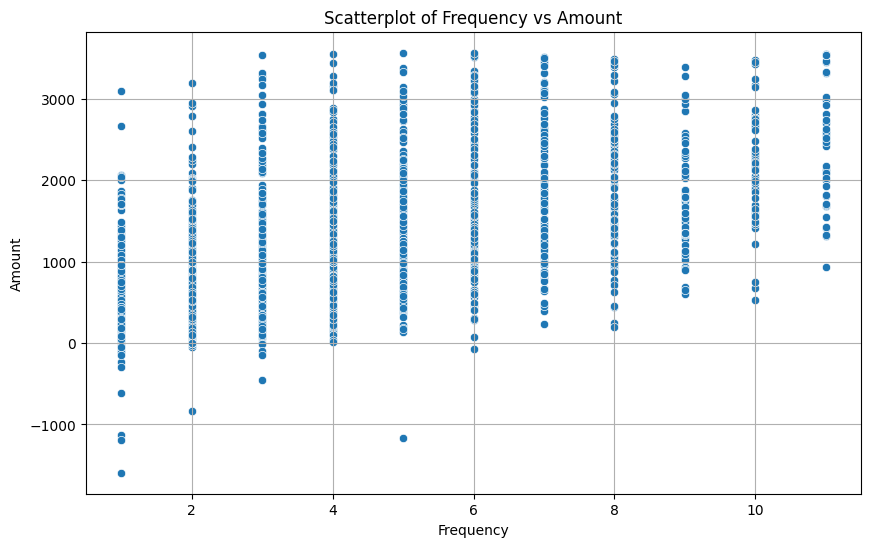

In [ ]:
#Create a scatterplot showing Frequency and Amount
plt.figure(figsize=(10,6))
sns.scatterplot(data = cs_cleaned, x = 'Frequency', y= 'Amount')
plt.title('Scatterplot of Frequency vs Amount')
plt.xlabel('Frequency')
plt.ylabel('Amount')
plt.grid(True)
plt.show()